In [1]:
from nilearn.datasets import fetch_localizer_contrasts
n_subjects = 2
data = fetch_localizer_contrasts(["left vs right button press"], n_subjects,
                                 get_tmaps=True)

from nilearn import plotting

/opt/miniconda-latest/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "



Dataset created in /home/jsmentch/nilearn_data/brainomics_localizer



 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)
/opt/miniconda-latest/lib/python3.8/site-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [2]:
data['cmaps']

['/home/jsmentch/nilearn_data/brainomics_localizer/brainomics_data/S01/cmaps_LeftAuditory&VisualClickVsRightAuditory&VisualClick.nii.gz',
 '/home/jsmentch/nilearn_data/brainomics_localizer/brainomics_data/S02/cmaps_LeftAuditory&VisualClickVsRightAuditory&VisualClick.nii.gz']

In [2]:
import pandas as pd
second_level_input = data['cmaps']
design_matrix = pd.DataFrame([1] * len(second_level_input),
                             columns=['intercept'])

In [3]:
from nilearn.glm.second_level import SecondLevelModel
second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
second_level_model = second_level_model.fit(second_level_input,
                                            design_matrix=design_matrix)

In [4]:
z_map = second_level_model.compute_contrast(output_type='z_score')

/opt/miniconda-latest/lib/python3.8/site-packages/nilearn/plotting/displays.py:880: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


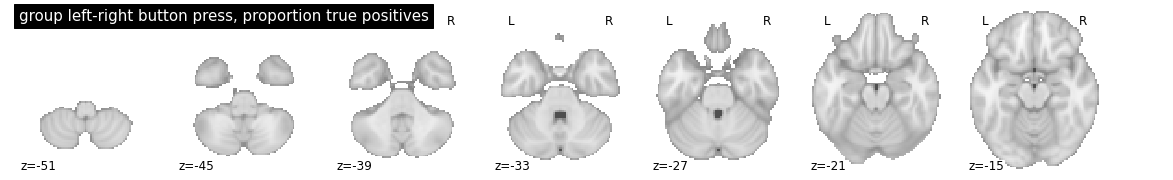

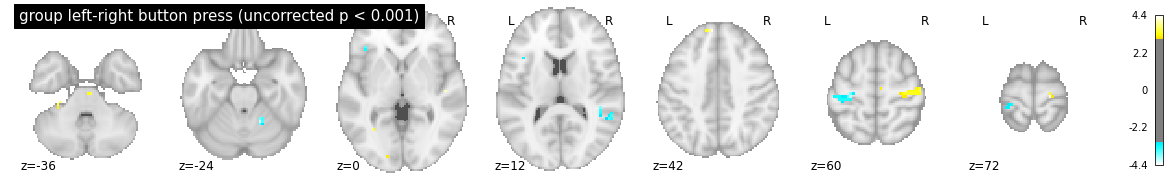

In [5]:
from scipy.stats import norm
p_val = 0.001
p001_uncorrected = norm.isf(p_val)

from nilearn.glm import cluster_level_inference
proportion_true_discoveries_img = cluster_level_inference(
    z_map, threshold=[3, 4, 5], alpha=.05)

plotting.plot_stat_map(
    proportion_true_discoveries_img, threshold=0.,
    display_mode='z', vmax=1, colorbar=True,
    title='group left-right button press, proportion true positives')

plotting.plot_stat_map(
    z_map, threshold=p001_uncorrected, colorbar=True, display_mode='z',
    title='group left-right button press (uncorrected p < 0.001)')


plotting.show()